- Importing the required Libraries 
- Reading the dataset 
- Taking care of null values 

In [41]:
import pandas as pd 
import numpy as np 
import warnings as w
w.filterwarnings('ignore')

In [42]:
df = pd.read_csv(r"Pune Restaurants.csv")
df

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Known_for1,Known_for2
0,Santè Spa Cuisine,"Continental, Healthy Food, Mediterranean",1200,"Koregaon Park, Pune",4.9,1469,3.9,588,https://www.zomato.com/pune/santè-spa-cuisine-...,"Lane 1, Near Sunderban Resorts, Koregaon Park,...",9.18E+11,18.537416,73.888890,"Bajra Risotto, Spinach Hummus, Whole Wheat Spa...","Nothing to Dislike, Healthy Menu, Healthy Food..."
1,Le Plaisir,"Cafe, Italian, Continental, Salad, Sandwich, P...",1000,"Deccan Gymkhana, Pune",4.9,4808,4.3,4959,https://www.zomato.com/pune/le-plaisir-deccan-...,"Survey 759/125, Rajkamal, Prabhat Road, Opposi...",9.19E+11,18.514254,73.838658,"Expresso Panacota, Banana Nutella Crepe, New Y...","Classy Place, Classy Ambience, Perfect Evening..."
2,Gong,"Chinese, Sushi, Asian, Momos, Beverages",1700,"Balewadi High Street, Baner, Pune",4.9,1788,4.3,1352,https://www.zomato.com/pune/gong-baner,"Shop 22/23, Cummins India Office Campus, Balew...",9.19E+11,18.570471,73.774149,"Chicken Minestrone Soup, Crab Ravioli, Ebi Tem...","Classy Place, Quality of Food, Amazing Interio..."
3,The French Window Patisserie,"Cafe, Desserts, French, Bakery, European",600,"Koregaon Park, Pune",4.9,1643,4.4,1208,https://www.zomato.com/pune/the-french-window-...,"Lane Number 5, Ganga Fortune Society, Meera Na...",9.20E+11,18.537432,73.897714,"Trois Chocolat, Chocolate Flan, Mille Feuille,...","Bookshelf, Beautiful Cafe, Pretty Ambience, Pe..."
4,Savya Rasa,"South Indian, Mangalorean, Kerala, Chettinad, ...",2100,"Koregaon Park, Pune",4.9,1283,4.3,446,https://www.zomato.com/pune/savya-rasa-koregao...,"Flat 2, Survey 479 & 480, Gera Serenity, North...",9.19E+11,18.538862,73.886621,"Bun Paratha, Pallipalayam Kozhi, Palm Sugar, V...","Sophisticated, Worth the Price, Warm Ambience,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,Atharva Pure Veg,"North Indian, South Indian, Chinese, Fast Food...",600,"Bhosari, Pune",3.0,45,NaN,0,https://www.zomato.com/pune/atharva-pure-veg-b...,"Hajare Vasti, Pune-Nashik Highway, Moshi, Bhos...",9.20E+11,18.664086,73.848660,"Bar Food, North Indian, Fast Food, Italian, St...",NaN
4793,Wow! Momo,"Momos, Tibetan, Fast Food",400,"Kothrud, Pune",3.0,63,4.1,1212,https://www.zomato.com/pune/wow-momo-kothrud,"Shop 32, Ground Floor, Karishma Society, Kothr...",9.18E+11,18.502520,73.821746,"Student Crowd, Elaborate Menu, Great Portions,...",NaN
4794,Fried Chicken Destination,Fast Food,400,"Kothrud, Pune",3.0,7,3.9,359,https://www.zomato.com/pune/fried-chicken-dest...,"Shop 5, Khandoba Sadan Building, Kothrud, Pune",9.18E+11,18.501703,73.813066,"Worth the Money, Timely Service, Great Portion...",NaN
4795,Hotel Shree Yash,"North Indian, Biryani, Mughlai, Maharashtrian,...",1000,"Bhosari, Pune",3.0,20,4.1,491,https://www.zomato.com/pune/hotel-shree-yash-b...,"108, S Block, MIDC, Bhosari, Pune",9.12E+11,18.623934,73.839943,NaN,NaN


- After checking the null values we can see 3 columns have null values 
- I've filled delivery_rating with median 
- I've filled null values for known_for1 by using ffill and bfill
- I've dropped Known_for2 column

In [43]:
df.isnull().sum()

Restaurant_Name             0
Category                    0
Pricing_for_2               0
Locality                    0
Dining_Rating               0
Dining_Review_Count         0
Delivery_Rating          1571
Delivery_Rating_Count       0
Website                     0
Address                     0
Phone_No                    0
Latitude                    0
Longitude                   0
Known_for1                642
Known_for2               3719
dtype: int64

Text(0, 0.5, 'Frequency')

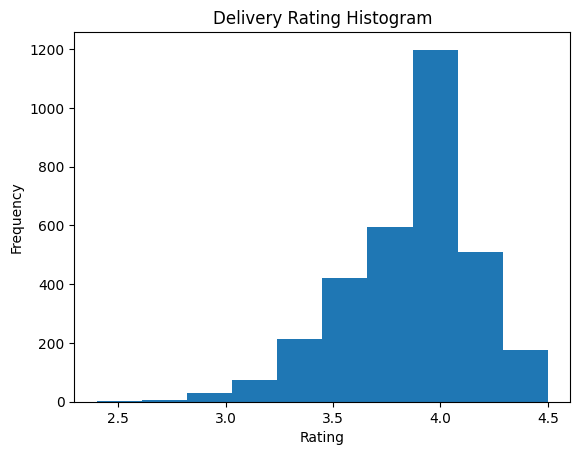

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the 'delivery_rating' column from your DataFrame
Delivery_Rating_data = df['Delivery_Rating']

# Create the histogram
plt.hist(Delivery_Rating_data, bins=10)  # Adjust the number of bins as needed

# Optional: Customize the plot
plt.title('Delivery Rating Histogram')
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [45]:
# Calculate the median of the 'Delivery_Rating' column
median_rating = df['Delivery_Rating'].median()

In [46]:
# Fill the missing values with the median
df['Delivery_Rating'].fillna(median_rating, inplace=True)

In [47]:
df.isna().sum()

Restaurant_Name             0
Category                    0
Pricing_for_2               0
Locality                    0
Dining_Rating               0
Dining_Review_Count         0
Delivery_Rating             0
Delivery_Rating_Count       0
Website                     0
Address                     0
Phone_No                    0
Latitude                    0
Longitude                   0
Known_for1                642
Known_for2               3719
dtype: int64

In [48]:
#Going to forward fill the Known_for1 column 
# Forward fill missing values
df['Known_for1'].fillna(method='ffill', inplace=True)
# Backward fill missing values
df['Known_for1'].fillna(method='bfill', inplace=True)

In [49]:
#checking if the values are imputed 
df.isna().sum()

Restaurant_Name             0
Category                    0
Pricing_for_2               0
Locality                    0
Dining_Rating               0
Dining_Review_Count         0
Delivery_Rating             0
Delivery_Rating_Count       0
Website                     0
Address                     0
Phone_No                    0
Latitude                    0
Longitude                   0
Known_for1                  0
Known_for2               3719
dtype: int64

- here is the clean dataframe 

In [50]:
#creating a new dataframe and droppimg "known_for2" column 
df = df[['Restaurant_Name','Category','Pricing_for_2','Locality','Dining_Rating','Delivery_Rating','Website','Known_for1']]

In [51]:
df

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Delivery_Rating,Website,Known_for1
0,Santè Spa Cuisine,"Continental, Healthy Food, Mediterranean",1200,"Koregaon Park, Pune",4.9,3.9,https://www.zomato.com/pune/santè-spa-cuisine-...,"Bajra Risotto, Spinach Hummus, Whole Wheat Spa..."
1,Le Plaisir,"Cafe, Italian, Continental, Salad, Sandwich, P...",1000,"Deccan Gymkhana, Pune",4.9,4.3,https://www.zomato.com/pune/le-plaisir-deccan-...,"Expresso Panacota, Banana Nutella Crepe, New Y..."
2,Gong,"Chinese, Sushi, Asian, Momos, Beverages",1700,"Balewadi High Street, Baner, Pune",4.9,4.3,https://www.zomato.com/pune/gong-baner,"Chicken Minestrone Soup, Crab Ravioli, Ebi Tem..."
3,The French Window Patisserie,"Cafe, Desserts, French, Bakery, European",600,"Koregaon Park, Pune",4.9,4.4,https://www.zomato.com/pune/the-french-window-...,"Trois Chocolat, Chocolate Flan, Mille Feuille,..."
4,Savya Rasa,"South Indian, Mangalorean, Kerala, Chettinad, ...",2100,"Koregaon Park, Pune",4.9,4.3,https://www.zomato.com/pune/savya-rasa-koregao...,"Bun Paratha, Pallipalayam Kozhi, Palm Sugar, V..."
...,...,...,...,...,...,...,...,...
4792,Atharva Pure Veg,"North Indian, South Indian, Chinese, Fast Food...",600,"Bhosari, Pune",3.0,3.9,https://www.zomato.com/pune/atharva-pure-veg-b...,"Bar Food, North Indian, Fast Food, Italian, St..."
4793,Wow! Momo,"Momos, Tibetan, Fast Food",400,"Kothrud, Pune",3.0,4.1,https://www.zomato.com/pune/wow-momo-kothrud,"Student Crowd, Elaborate Menu, Great Portions,..."
4794,Fried Chicken Destination,Fast Food,400,"Kothrud, Pune",3.0,3.9,https://www.zomato.com/pune/fried-chicken-dest...,"Worth the Money, Timely Service, Great Portion..."
4795,Hotel Shree Yash,"North Indian, Biryani, Mughlai, Maharashtrian,...",1000,"Bhosari, Pune",3.0,4.1,https://www.zomato.com/pune/hotel-shree-yash-b...,"Worth the Money, Timely Service, Great Portion..."


Here I've done some basic text processing 
- removed punctuations 
- removed stopwords 
- Conversion to lowercase

In [52]:
#Preprocessing the category column 
import neattext as nt

#To remove punctuations from the desired column
df['Category']=df['Category'].apply(nt.remove_punctuations)

#To remove stopwords
df['Category']=df['Category'].apply(nt.remove_stopwords)

#To lowercase everything
df['Category'] = df['Category'].str.lower()

In [53]:
df['Category']

0                  continental healthy food mediterranean
1       cafe italian continental salad sandwich pizza ...
2                     chinese sushi asian momos beverages
3                    cafe desserts french bakery european
4       south indian mangalorean kerala chettinad beve...
                              ...                        
4792    north indian south indian chinese fast food de...
4793                              momos tibetan fast food
4794                                            fast food
4795    north indian biryani mughlai maharashtrian sea...
4796    north indian continental chinese desserts beve...
Name: Category, Length: 4797, dtype: object

In [54]:
#To remove punctuations from the desired column
df['Locality']=df['Locality'].apply(nt.remove_punctuations)

#To remove stopwords
df['Locality']=df['Locality'].apply(nt.remove_stopwords)

#To lowercase everything
df['Locality'] = df['Locality'].str.lower()

In [55]:
df['Locality']

0                    koregaon park pune
1                  deccan gymkhana pune
2       balewadi high street baner pune
3                    koregaon park pune
4                    koregaon park pune
                     ...               
4792                       bhosari pune
4793                       kothrud pune
4794                       kothrud pune
4795                       bhosari pune
4796                      wanowrie pune
Name: Locality, Length: 4797, dtype: object

In [56]:
#To remove punctuations from the desired column
df['Known_for1']=df['Known_for1'].apply(nt.remove_punctuations)

#To remove stopwords
df['Known_for1']=df['Known_for1'].apply(nt.remove_stopwords)

#To lowercase everything
df['Known_for1'] = df['Known_for1'].str.lower()

In [57]:
df['Known_for1']

0       bajra risotto spinach hummus wheat spaghetti h...
1       expresso panacota banana nutella crepe new yor...
2       chicken minestrone soup crab ravioli ebi tempu...
3       trois chocolat chocolate flan mille feuille ch...
4       bun paratha pallipalayam kozhi palm sugar vege...
                              ...                        
4792    bar food north indian fast food italian street...
4793    student crowd elaborate menu great portions cu...
4794    worth money timely service great portions deli...
4795    worth money timely service great portions deli...
4796    rooftop ambience good place prices music nice ...
Name: Known_for1, Length: 4797, dtype: object

- Changing the name of some columns for easy references 

In [58]:
df = df.rename(columns={'Known_for1':'Known_for','Pricing_for_2':'Cost_for_2',})
df.columns

Index(['Restaurant_Name', 'Category', 'Cost_for_2', 'Locality',
       'Dining_Rating', 'Delivery_Rating', 'Website', 'Known_for'],
      dtype='object')

- Populating the mean rating columnn for Dining_Rating

In [59]:
restaurants = list(df['Restaurant_Name'].unique())
df['Mean Rating'] = 0

for i in range(len(restaurants)):
    df['Mean Rating'][df['Restaurant_Name'] == restaurants[i]] = df['Dining_Rating'][df['Restaurant_Name'] == restaurants[i]].mean()

In [60]:
df.sample(3)

,Restaurant_Name,Category,Cost_for_2,Locality,Dining_Rating,Delivery_Rating,Website,Known_for,Mean Rating
2847,Appetite,north indian chinese italian pizza mughlai,1100,pimpri pune,3.5,3.9,https://www.zomato.com/pune/appetite-pimpri,bar food north indian fast food italian street...,3.5
1426,Wok Masters,chinese thai asian,800,kharadi pune,3.8,3.6,https://www.zomato.com/pune/wok-masters-kharadi,asian zing pan fried noodles fried rice chicke...,3.8
4007,Cafe Mastani,fast food beverages street food,350,wadgaon sheri pune,3.3,3.0,https://www.zomato.com/pune/cafe-mastani-wadga...,delicious taste mouth watering food affordable...,3.3


- As we can see the mean rating column is populated now we can further scale it using min-max scalar

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,5))

df[['Mean Rating']] = scaler.fit_transform(df[['Mean Rating']]).round(2)

df.sample(3)

,Restaurant_Name,Category,Cost_for_2,Locality,Dining_Rating,Delivery_Rating,Website,Known_for,Mean Rating
3990,Param Panchwati Dining Hall,north indian,200,chakan pune,3.3,3.9,https://www.zomato.com/pune/param-panchwati-di...,italian pizza pasta fast food desserts beverages,1.63
1062,The Hangout,north indian chinese malwani seafood,1300,wagholi pune,3.9,3.6,https://www.zomato.com/pune/the-hangout-wagholi,relaxed atmosphere privacy awesome service fri...,2.89
2316,Hotel Maratha Velu,maharashtrian,650,shivapur pune,3.6,3.9,https://www.zomato.com/pune/hotel-maratha-velu...,bar food north indian fast food italian street...,2.26


- Function get_top_words that takes a column, the number of top words to return, and the n-gram range as parameters. 
- It uses the CountVectorizer from scikit-learn to compute the frequency of words in the column. 

In [62]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]

In [64]:
get_top_words(df['Category'], 10, (1, 1))

[('indian', 3031),
 ('north', 2503),
 ('food', 2347),
 ('chinese', 1976),
 ('fast', 1535),
 ('beverages', 1440),
 ('maharashtrian', 800),
 ('mughlai', 698),
 ('desserts', 659),
 ('street', 646)]

- The above output is a list of tuples representing the top 10 words and their corresponding frequencies in the 'Category' column of your DataFrame.
- Each tuple consists of a word and its frequency count.
- The output shows the top 10 most frequent words in the 'Category' column, along with their respective frequencies. For example:

- 'indian' appears 3031 times in the 'Text' column.

In [65]:
#sampling the data 
df_percent = df.sample(frac=1)
df_percent.shape

(4797, 9)

- Term Frequency-Inverse Document Frequency
- Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each column represents a restaurant, as before.
- TF-IDF is the statistical method of evaluating the significance of a word in a given document.
- TF — Term frequency(tf) refers to how many times a given term appears in a document.
- IDF — Inverse document frequency(idf) measures the weight of the word in the document, i.e if the word is common or rare in the entire document. The TF-IDF intuition follows that the terms that appear frequently in a document are less important than terms that rarely appear. Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix quite easily.

In [66]:
df_percent.set_index('Restaurant_Name', inplace=True)

In [67]:
indices = pd.Series(df_percent.index)
indices

0               Mirch Masala Resto Bar
1                        Hotel Gayatri
2                               Cafe 9
3       Jalsa Family Garden Restaurant
4          K 9 The Schezwan Restaurant
                     ...              
4792                       Chalo Dilli
4793                 Cafe Unique Table
4794              Kabana - Conrad Pune
4795                     Hotel Niyamat
4796                        Eat's Time
Name: Restaurant_Name, Length: 4797, dtype: object

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['Known_for'])

- Here we've calculated the cosine similarity 

In [70]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [71]:
cosine_similarities

array([[1.        , 0.0212056 , 0.0212056 , ..., 0.        , 0.00750353,
        0.00316495],
       [0.0212056 , 1.        , 1.        , ..., 0.        , 0.26523737,
        0.02735268],
       [0.0212056 , 1.        , 1.        , ..., 0.        , 0.26523737,
        0.02735268],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00750353, 0.26523737, 0.26523737, ..., 0.        , 1.        ,
        0.00967866],
       [0.00316495, 0.02735268, 0.02735268, ..., 0.        , 0.00967866,
        1.        ]])

- This is the recommend function which calculates cosine similarity after the restaurant name is put on and then recommends top 5 restaurants by cosine similarity scores 

In [87]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    
    # Create the top 30 similar restaurants with some of their columns without append method
    categories = []
    mean_ratings = []
    cost_for_2s = []
    delivery_ratings = []
    websites = []

    for each in top30_indexes:
        categories.append(df_percent['Category'].iloc[each])
        mean_ratings.append(df_percent['Mean Rating'].iloc[each])
        cost_for_2s.append(df_percent['Cost_for_2'].iloc[each])
        delivery_ratings.append(df_percent['Delivery_Rating'].iloc[each])
        websites.append(df_percent['Website'].iloc[each])
        pass

    df_new = pd.DataFrame({'Category': categories,'Mean Rating': mean_ratings,'Cost_for_2': cost_for_2s,'Delivery_Rating': delivery_ratings,'Website': websites})

    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['Category', 'Mean Rating', 'Cost_for_2','Delivery_Rating', 'Website'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(5)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

- Here I've tried & applied the function and it works nicely

In [88]:
recommend("Burger King")

TOP 5 RESTAURANTS LIKE Burger King WITH SIMILAR REVIEWS: 


,Category,Mean Rating,Cost_for_2,Delivery_Rating,Website
16,south indian street food fast food north india...,3.95,700,4.1,https://www.zomato.com/pune/ram-krishna-camp-area
10,bakery,3.74,300,3.9,https://www.zomato.com/pune/cake-n-counter-eas...
18,beverages desserts ice cream,3.74,400,4.2,https://www.zomato.com/pune/frozen-bottle-2-fc...
15,north indian chinese mughlai biryani kebab,3.53,700,3.6,https://www.zomato.com/apnapunjab
25,north indian continental finger food italian b...,3.53,1500,3.9,https://www.zomato.com/pune/ttf-the-tenth-floo...
